# **Data sources**


### 1. Music Data Collection
### 2. Covid Data (North America)

-------------------------------------------------------
### * Pulling data was followed by data cleaning for each dataset, at the same time
-------------------------------------------------------

# **1. Music data collection**


1.   Billboard 100 data were used for creation of the list of user's favorite songs
from 2018-03-01 to 2023-02-18
2.   Spotify data were used to characterize top 100 song features

In [ ]:
 pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id='0f0f0275da9c4a41a2723be8bdb34687', client_secret='9348d0bf13b842798db7792e8e1004d9')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Billboard 100 data

In [ ]:
#since we wanted to examine data beyond what was available in the kaggle dataset, additional Billboard data was sourced
#using billboard.py, from https://pypi.org/project/billboard.py/

#pip install billboard.py
#>>> import billboard
#>>> chart = billboard.ChartData('hot-100')
#>>> song = chart[0]
#>>> song.title
#>>> song.artist
#>>> song.weeks
#import pandas as pd
#from datetime import datetime, timedelta
#billresults = []
#current_date = datetime.strptime('2021/11/13', '%Y/%m/%d')
#end_date = datetime.strptime('2023/02/25', '%Y/%m/%d')
#delta = timedelta(days=7)
#while current_date < end_date:
#    ds = current_date.strftime('%Y-%m-%d')
#    print(f'Fetching chart for {ds}')
#    for ce in billboard.ChartData('hot-100', date=ds):
#        billresults.append([ds, ce.rank,ce.title, ce.artist, ce.lastPos, ce.peakPos, ce.weeks])
#    current_date += delta
#billboard = pd.DataFrame(billresults)
#writer = pd.ExcelWriter('20212023copy.xlsx', engine='xlsxwriter')
#billboard.to_excel(writer, sheet_name='Billboard')
#writer.save()
#df_bill2023=pd.read_excel('20212023copy.xlsx', index_col = 0)
#df_2023_2 = df_2023.rename(columns={0: "date", 1: "rank", 2: "song", 3: "artist", 4: "last-week", 5: "peak_rank", 6: "weeks_on_board"})


df_2023=pd.read_excel('Billboard Data 2021-2023.xlsx')
df_2023

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-13,1,Easy On Me,Adele,1,1,4
1,2021-11-13,2,Stay,The Kid LAROI & Justin Bieber,2,1,17
2,2021-11-13,3,Industry Baby,Lil Nas X & Jack Harlow,3,1,15
3,2021-11-13,4,Bad Habits,Ed Sheeran,5,2,19
4,2021-11-13,5,Fancy Like,Walker Hayes,4,3,20
...,...,...,...,...,...,...,...
6695,2023-02-18,96,Yandel 150,Yandel & Feid,0,96,1
6696,2023-02-18,97,Heart To Heart,Mac DeMarco,98,83,4
6697,2023-02-18,98,Next Thing You Know,Jordan Davis,95,91,3
6698,2023-02-18,99,Never Gonna Not Dance Again,P!nk,99,99,2


In [ ]:
#first, Billboard data from March 3rd, 2018 - October 30th, 2021 was downloaded from kaggle:
#https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

df_bill=pd.read_csv('df_bill.csv')
df_bill

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,10/30/2021,1,Easy On Me,Adele,68.0,1,2
1,10/30/2021,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,15
2,10/30/2021,3,Industry Baby,Lil Nas X & Jack Harlow,1.0,1,13
3,10/30/2021,4,Fancy Like,Walker Hayes,3.0,3,18
4,10/30/2021,5,Bad Habits,Ed Sheeran,4.0,2,17
...,...,...,...,...,...,...,...
19195,3/3/2018,96,IDGAF,Dua Lipa,99.0,88,6
19196,3/3/2018,97,Rubbin Off The Paint,YBN Nahmir,NaN,46,14
19197,3/3/2018,98,One Foot,WALK THE MOON,87.0,65,8
19198,3/3/2018,99,Female,Keith Urban,NaN,69,6


In [ ]:
df_billboard=pd.concat([df_2023,df_bill],axis=0)
all_songs=df_billboard['song'].unique()
len(all_songs)


3057

### Pull data from spotify
-Data might change overtime, so we export the resulting dataset and load it for analysis later. Please see attachment for dataset pulled.

In [ ]:
# Pull data from spotify
# def get_trackfeatures(x):
#     track_results = sp.search(q=x, type='track')
#     track_id = track_results['tracks']['items'][0]['id']
#     track_features = sp.audio_features([track_id])[0]
#     if track_features is None:
#         df1 = pd.DataFrame()
#     else:
#         features={'danceability':track_features['danceability'],
#              'energy':track_features['energy'],
#              'liveness':track_features['liveness'],
#              'valence':track_features['valence']}
#         df1 = pd.DataFrame(features, index=[x])
#     return df1


# df_spotify2023= pd.DataFrame()
# for i in all_songs:
#     df_spotify2023=pd.concat([df_spotify2023,get_trackfeatures(i)],axis=0)

In [ ]:
# df_spotify2023.to_excel('df_spotify2023.xlsx')

In [ ]:
df_spotify2023=pd.read_excel('df_spotify2023.xlsx',index_col=0)

In [ ]:
df_spotify2023
#found 3055 matched song.

,danceability,energy,liveness,valence
Easy On Me,0.604,0.366,0.1330,0.130
Stay,0.621,0.310,0.1170,0.125
Industry Baby,0.736,0.704,0.0501,0.894
Bad Habits,0.807,0.893,0.3660,0.537
Fancy Like,0.647,0.765,0.3150,0.855
...,...,...,...,...
Big Shot,0.878,0.714,0.1430,0.636
End Game,0.649,0.589,0.1080,0.151
For You (Fifty Shades Freed),0.540,0.804,0.2040,0.175
One Foot,0.582,0.822,0.8180,0.471


In [ ]:
df_song=pd.merge(df_billboard,df_spotify2023,how='left', left_on='song', right_index=True)
df_song=df_song.drop(['rank','last-week','peak-rank','weeks-on-board'],axis=1)
#df_song.to_excel('song.xlsx')

In [ ]:
#Checking data
df_song.describe(include='all')

,date,song,artist,danceability,energy,liveness,valence
count,25900,25900,25900,25860.000000,25860.000000,25860.000000,25860.000000
unique,259,3057,1585,NaN,NaN,NaN,NaN
top,2021-11-13,Blinding Lights,Taylor Swift,NaN,NaN,NaN,NaN
freq,100,90,361,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.668731,0.624537,0.178622,0.488212
std,NaN,NaN,NaN,0.144308,0.162193,0.131316,0.221196
min,NaN,NaN,NaN,0.078700,0.003750,0.019400,0.020700
25%,NaN,NaN,NaN,0.568000,0.523000,0.098600,0.327000
50%,NaN,NaN,NaN,0.679000,0.633000,0.126000,0.478000
75%,NaN,NaN,NaN,0.775000,0.743000,0.224000,0.654000


In [ ]:
df_song.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25900 entries, 0 to 19199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          25900 non-null  object 
 1   song          25900 non-null  object 
 2   artist        25900 non-null  object 
 3   danceability  25860 non-null  float64
 4   energy        25860 non-null  float64
 5   liveness      25860 non-null  float64
 6   valence       25860 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


## Music Data Cleaning:




In [ ]:
#missing data
df_miss=df_song[df_song['danceability'].isna()|df_song['energy'].isna()|df_song['liveness'].isna()|df_song['valence'].isna()]

In [ ]:
df_miss.info()
#All songs having missing parameter does not have any track feature in the 4 parameters.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song          0 non-null      object 
 1   artist        0 non-null      object 
 2   danceability  0 non-null      float64
 3   energy        0 non-null      float64
 4   liveness      0 non-null      float64
 5   valence       0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 0.0+ bytes


In [ ]:
df_miss.artist.value_counts()

Series([], Name: artist, dtype: int64)

In [ ]:
listofmissingartist=set(df_miss['artist'])
listofmissingartist

set()

In [ ]:
df_song.loc[df_song['artist'].isin(listofmissingartist),'artist'].value_counts()
#We found only one song for each artist Why Don't We
#and they are missing all features, we could not predict feature for them, so will remove it.

Series([], Name: artist, dtype: int64)

In [ ]:
all4features=['danceability','energy','liveness','valence']

In [ ]:
df_song.loc[df_song['artist'] == 'Trevor Daniel', all4features].mean()
#no feature value for all songs for trevor daniel, no point keeping them

danceability   NaN
energy         NaN
liveness       NaN
valence        NaN
dtype: float64

In [ ]:
Harrymean=df_song.loc[df_song['artist'] == 'Harry Styles', all4features].mean()

In [ ]:
Harrymean

danceability    0.605361
energy          0.710848
liveness        0.202196
valence         0.557804
dtype: float64

In [ ]:
#Remove all songs which features cannot be predicted
df_song = df_song[~df_song['artist'].isin(['Trevor Daniel','Why Don\'t We'])]


In [ ]:
#Assign estimated feature values for songs predicted based on average feature value of the artist
for i in all4features:
    df_song.loc[(df_song['artist'] == 'Harry Styles') & (df_song[i].isna()), i] = getattr(Harrymean, i)

In [ ]:
#Checking data after filling N/A
df_song.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25861 entries, 2021-11-13 to 2018-03-03
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song          25861 non-null  object 
 1   artist        25861 non-null  object 
 2   danceability  25861 non-null  float64
 3   energy        25861 non-null  float64
 4   liveness      25861 non-null  float64
 5   valence       25861 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
 df_song.to_excel('df_song_cleaned.xlsx')
 #download and save this file if you want to skip the song import next time

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_song

,song,artist,danceability,energy,liveness,valence
date,,,,,,
2021-11-13,Easy On Me,Adele,0.604,0.366,0.1330,0.130
2021-11-13,Stay,The Kid LAROI & Justin Bieber,0.621,0.310,0.1170,0.125
2021-11-13,Industry Baby,Lil Nas X & Jack Harlow,0.736,0.704,0.0501,0.894
2021-11-13,Bad Habits,Ed Sheeran,0.807,0.893,0.3660,0.537
2021-11-13,Fancy Like,Walker Hayes,0.647,0.765,0.3150,0.855
...,...,...,...,...,...,...
2018-03-03,IDGAF,Dua Lipa,0.836,0.544,0.0824,0.510
2018-03-03,Rubbin Off The Paint,YBN Nahmir,0.734,0.751,0.1830,0.560
2018-03-03,One Foot,WALK THE MOON,0.582,0.822,0.8180,0.471


# **2. Covid Data (North America)**
1. Covid data (new cases and new deaths) were downloaded from #data from https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false&country=USA~GBR~CAN~DEU~ITA~IND

2. N/A values were filled in using fillna(0) method because in the original dataset “N/A” indicated that no new cases/deaths occurred.
3. Total daily and monthly cases/deaths were calculated.
4. Pre-covid (2016-07-01 to 2020-03-1), covid (2020-03-1 to 2022-03-1), and post-covid (after 2022-03-1) periods were identified based on visual inspection of the plots.



In [ ]:
#data from https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&facet=none&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false&country=USA~GBR~CAN~DEU~ITA~IND
covid=pd.read_csv('covid.csv')
covid
covid_na=covid.loc[covid['location']=='North America']


## Covid Data Cleaning:

In [ ]:
covid_clean=covid_na.fillna(0)
covid_clean['date']=pd.to_datetime(covid_clean['date'])
covid_clean.set_index('date', inplace=True)
cases=covid_clean['new_cases']
death=covid_clean['new_deaths']
cases_month=cases.resample("M").sum()
death_month=death.resample('M').sum()
death_array=death_month.to_numpy()
cases_array=cases_month.to_numpy()

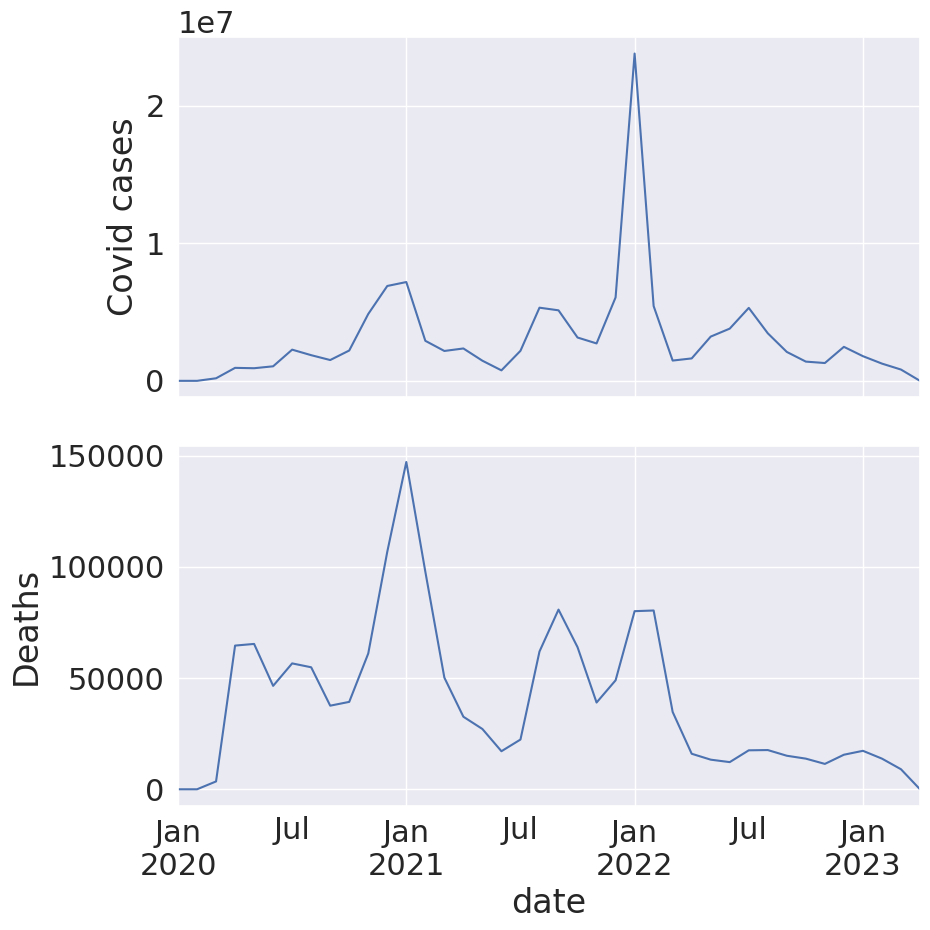

In [ ]:
#covid data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
cases_month.plot(ax=axes[0], sharex=True, ylabel='Covid cases')
death_month.plot(ax=axes[1],sharex=True, ylabel='Deaths')
plt.show()

# **3. Splitting dataset and calculation of monthly anerages for music features**

In [ ]:
def getmonthlymean(f):
    return df_song.resample('M')[f].mean().to_frame()

df=pd.DataFrame()
for f in all4features:
    df=pd.concat([df,getmonthlymean(f)],axis=1)

df

,danceability,energy,liveness,valence
date,,,,
2018-03-31,0.682840,0.639195,0.166466,0.452026
2018-04-30,0.665528,0.637323,0.170280,0.455742
2018-05-31,0.676928,0.641195,0.175794,0.445260
2018-06-30,0.684764,0.639452,0.171941,0.453651
2018-07-31,0.680462,0.631370,0.170666,0.453748
2018-08-31,0.668678,0.642977,0.172630,0.446928
2018-09-30,0.665738,0.635388,0.165397,0.445016
2018-10-31,0.669055,0.633032,0.179882,0.453464
2018-11-30,0.675430,0.603882,0.175895,0.448488


In [ ]:
#Data splitiing
df3=df.reset_index()
def covid_gr(x):
    if (x > pd.to_datetime('2018-03-01')) & (x < pd.to_datetime('2020-03-1')):
        return 'pre_covid'
    elif (x >= pd.to_datetime('2020-03-1')) & (x < pd.to_datetime('2022-03-1')):
        return 'covid'
    else:
        return 'post covid'
df3['period'] = df3['date'].apply(covid_gr)
df3



,date,danceability,energy,liveness,valence,period
0,2018-03-31,0.682840,0.639195,0.166466,0.452026,pre_covid
1,2018-04-30,0.665528,0.637323,0.170280,0.455742,pre_covid
2,2018-05-31,0.676928,0.641195,0.175794,0.445260,pre_covid
3,2018-06-30,0.684764,0.639452,0.171941,0.453651,pre_covid
4,2018-07-31,0.680462,0.631370,0.170666,0.453748,pre_covid
5,2018-08-31,0.668678,0.642977,0.172630,0.446928,pre_covid
6,2018-09-30,0.665738,0.635388,0.165397,0.445016,pre_covid
7,2018-10-31,0.669055,0.633032,0.179882,0.453464,pre_covid
8,2018-11-30,0.675430,0.603882,0.175895,0.448488,pre_covid
9,2018-12-31,0.662950,0.595156,0.185041,0.480628,pre_covid


# **4. Data analysis**
### 4.1. Descriptive statistics
### 4.2.   Data Distribution

1.   Normality
2.   Skewness

### 4.3.   Correlation Analysis
### 4.4.   Analysis of Variance (ANOVA)
### 4.5.   Temporal changes to music features
### 4.6.   K-Nearest Neighbors Algorithm

# 4.1. Descriptive statistics

In [ ]:
df3.groupby(['period'])['danceability', 'energy', 'liveness', 'valence'].agg(['mean','median', 'max','min', 'std'])

<ipython-input-162-f80e35b7d261>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby(['period'])['danceability', 'energy', 'liveness', 'valence'].agg(['mean','median', 'max','min', 'std'])


danceability                                            energy  \
                   mean    median       max       min       std      mean   
period                                                                      
covid          0.664710  0.663765  0.694871  0.636437  0.016632  0.623686   
post covid     0.658741  0.664798  0.685913  0.607668  0.023616  0.628482   
pre_covid      0.677349  0.676940  0.711738  0.642180  0.013904  0.623417   

                                                    liveness            \
              median       max       min       std      mean    median   
period                                                                   
covid       0.627166  0.650648  0.589172  0.019316  0.181744  0.179179   
post covid  0.637919  0.653705  0.571352  0.026129  0.181486  0.179523   
pre_covid   0.629603  0.648962  0.591926  0.018286  0.173849  0.173663   

                                           valence                      \
                 max       min       std      mean    median       max   
period                                                                   
covid       0.209510  0.160977  0.011937  0.497373  0.498837  0.526909   
post covid  0.201580  0.168506  0.009254  0.488852  0.486782  0.528788   
pre_covid   0.185041  0.164919  0.005889  0.478244  0.472636  0.519246   

                                
                 min       std  
period                          
covid       0.464580  0.019744  
post covid  0.423284  0.026112  
pre_covid   0.445016  0.027830

# 4.2. Data Distribution

1. Normality

In [ ]:
import math
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm

#creating arrays
danceability_ser=df3['danceability']
danceability_array=danceability_ser.to_numpy()
energy_ser=df3['energy']
energy_array=energy_ser.to_numpy()
liveness_ser=df3['liveness']
liveness_array=liveness_ser.to_numpy()
valence_ser=df3['valence']
valence_array=valence_ser.to_numpy()
cases=covid_clean['new_cases']
death=covid_clean['new_deaths']
cases_month=cases.resample("M").sum()
death_month=death.resample('M').sum()
death_array=death_month.to_numpy()
cases_array=cases_month.to_numpy()


In [ ]:
# Shapiro test
from scipy.stats import shapiro
features=['Danceability', 'Liveness', 'Energy', 'Valence', 'New deaths', 'New cases']
d_sh=shapiro(danceability_array)
l_sh=shapiro(liveness_array)
e_sh=shapiro(energy_array)
v_sh=shapiro(valence_array)
de_sh=shapiro(death_array)
c_sh=shapiro(cases_array)
test=pd.DataFrame([ d_sh, l_sh, e_sh, v_sh, de_sh, c_sh], columns=['Statistic', 'p_value'])
test['Features']=features
test
#Danceability - normal data distribution (p>0.05), Liveness - non-normal data distribution (p<0.05), Energy - non-normal data distribution (p<0.05), Valence-non-normal data distribution (p<0.05)

,Statistic,p_value,Features
0,0.966125,9.410145e-02,Danceability
1,0.923945,1.109583e-03,Liveness
2,0.931365,2.270254e-03,Energy
3,0.954871,2.654300e-02,Valence
4,0.899725,1.876791e-03,New deaths
5,0.581871,1.784500e-09,New cases


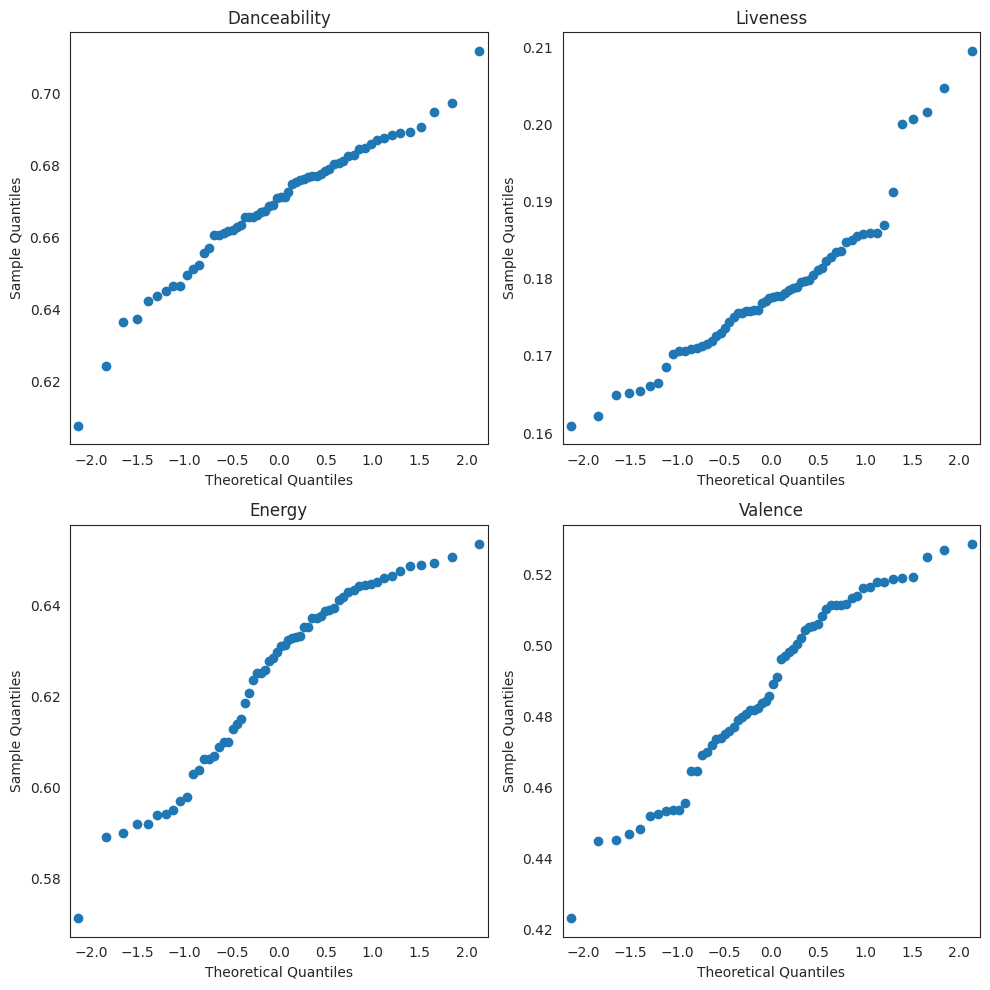

In [ ]:
# Q-Q plot

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sm.qqplot(df3['danceability'], ax=ax0)
sm.qqplot(df3['liveness'], ax=ax1)
sm.qqplot(df3['energy'], ax=ax2)
sm.qqplot(df3['valence'], ax=ax3)

ax0.set_title('Danceability')
ax1.set_title('Liveness')
ax2.set_title('Energy')
ax3.set_title('Valence')
sns.set_style("white")
plt.show()

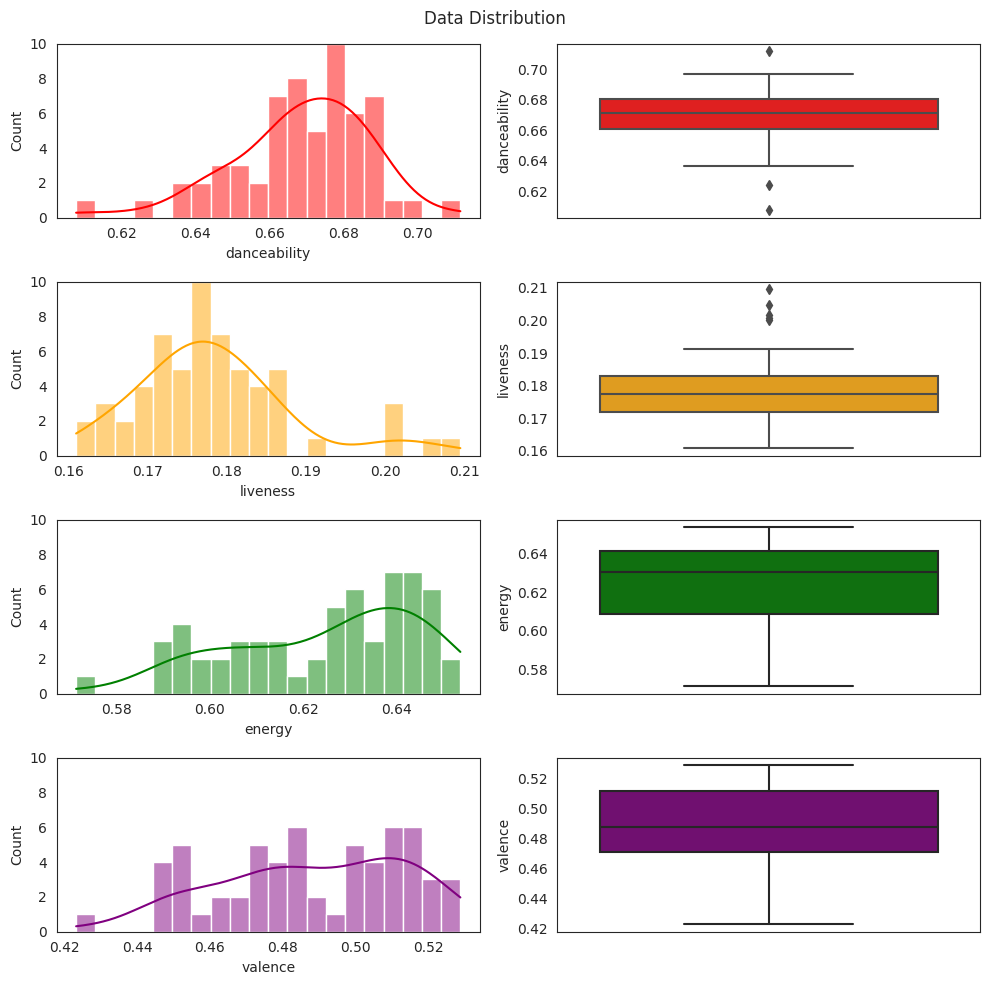

In [ ]:
# Histogram and BoxPlot

#music data

fig, axes = plt.subplots(4, 2, figsize=(10,10))
fig.suptitle('Data Distribution')
sns.set_style("white")
sns.histplot(df3['danceability'], kde=True, color='red', bins=20, ax=axes[0,0]).set(ylim=(0, 10))
sns.boxplot(data=df3,y='danceability', color="red", ax=axes[0,1])
sns.histplot(df3['liveness'], kde=True, color='orange', bins=20, ax=axes[1,0]).set(ylim=(0, 10))
sns.boxplot(data=df3,y='liveness', color="orange", ax=axes[1,1])
sns.histplot(df3['energy'], kde=True, color='green', bins=20, ax=axes[2,0]).set(ylim=(0, 10))
sns.boxplot(data=df3,y='energy',color="green",  ax=axes[2,1])
sns.histplot(df3['valence'], kde=True, color='purple',bins=20, ax=axes[3,0]).set(ylim=(0, 10))
sns.boxplot(data=df3,y='valence',color="purple", ax=axes[3,1])
plt.show()

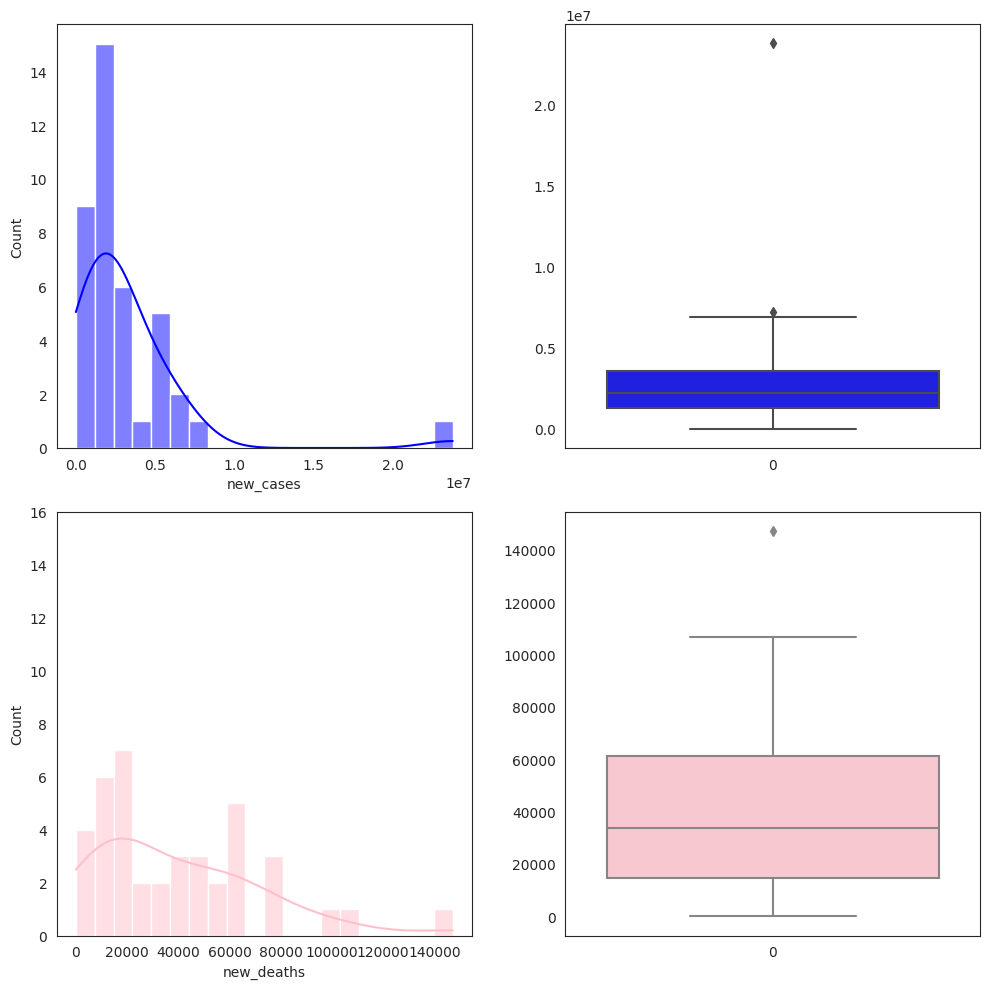

In [ ]:
#covid data
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=cases_month, kde=True ,color='blue',bins=20,ax=axes[0,0])
sns.boxplot(data=cases_month,color="blue", ax=axes[0,1])
sns.histplot(data=death_month, kde=True, color='pink',bins=20, ax=axes[1,0], label='Death').set(ylim=(0, 16))
sns.boxplot(data=death_month,color="pink", ax=axes[1,1])
plt.show()

2. Skewness

In [ ]:
#checking skewness
from scipy.stats import skew
d_s=skew(danceability_array)
l_s=skew(liveness_array)
e_s=skew(energy_array)
v_s=skew(valence_array)
de_s=skew(death_array)
c_s=skew(cases_array)
test_sk=pd.DataFrame([ d_s, l_s, e_s, v_s, de_s, c_s])
test_sk['Features']=features
test_sk
#skewness of music data is within acceptable range for parametric tests taking into accunt large saole size
#covid data are characterized by non-normal distribution and large skewnes

,0,Features
0,-0.715044,Danceability
1,1.026293,Liveness
2,-0.578456,Energy
3,-0.367985,Valence
4,1.105043,New deaths
5,4.010925,New cases


# 4.3. Correlation Analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
df4=pd.concat([df, cases_month, death_month], axis=1)
df4.reset_index(inplace=True)
df4.fillna(0, inplace=True)
df4.drop(labels=[60,61], axis=0)
df4.drop('date', axis=1, inplace=True)
df4

,danceability,energy,liveness,valence,new_cases,new_deaths
0,0.682840,0.639195,0.166466,0.452026,0.0,0.0
1,0.665528,0.637323,0.170280,0.455742,0.0,0.0
2,0.676928,0.641195,0.175794,0.445260,0.0,0.0
3,0.684764,0.639452,0.171941,0.453651,0.0,0.0
4,0.680462,0.631370,0.170666,0.453748,0.0,0.0
...,...,...,...,...,...,...
57,0.607668,0.571352,0.201580,0.481920,2470177.0,15534.0
58,0.624150,0.597990,0.185894,0.477223,1792471.0,17291.0
59,0.646573,0.625317,0.173556,0.484471,1252599.0,13780.0
60,0.000000,0.000000,0.000000,0.000000,819959.0,9005.0


In [ ]:
#Spearman correlation
df_corr_s = pd.DataFrame()
df_p_s = pd.DataFrame()
for x in df4.columns:
    for y in df4.columns:
        corr = stats.spearmanr(df4[x], df4[y])
        df_corr_s.loc[x,y] = corr[0]
        df_p_s.loc[x,y] = corr[1]

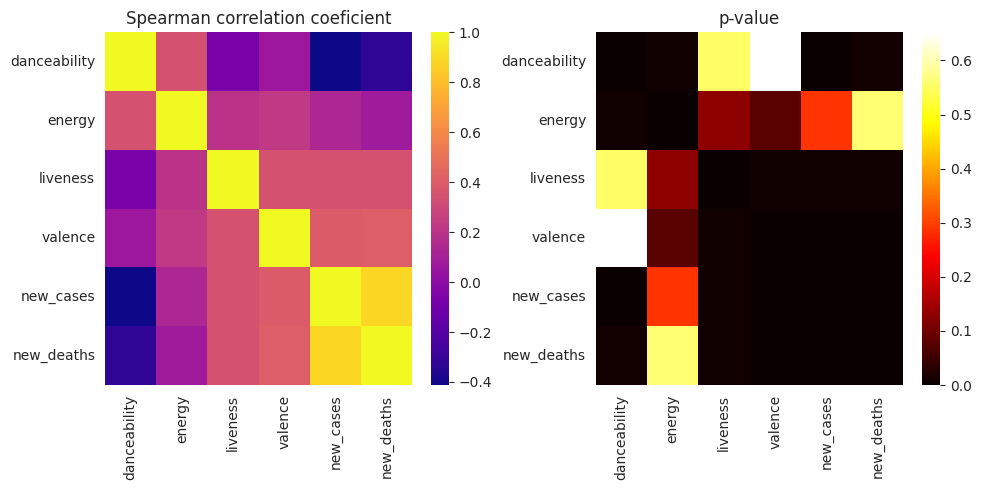

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title ('Spearman correlation coeficient')
ax2.set_title('p-value')
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df_corr_s, cmap="plasma", ax=ax1)
sns.heatmap(df_p_s, cmap="hot", ax=ax2)
fig.subplots_adjust(wspace=0.05)
plt.show()

In [ ]:
  keys=['Spearman correlation coeficient', 'p-value']
  stat_info_s=pd.DataFrame(pd.concat([df_corr_s, df_p_s], axis=0, keys=keys))
  stat_info_s.round(2)

danceability  energy  liveness  \
Spearman correlation coeficient danceability          1.00    0.35     -0.08   
                                energy                0.35    1.00      0.20   
                                liveness             -0.08    0.20      1.00   
                                valence               0.06    0.23      0.35   
                                new_cases            -0.41    0.14      0.34   
                                new_deaths           -0.32    0.08      0.35   
p-value                         danceability          0.00    0.01      0.55   
                                energy                0.01    0.00      0.13   
                                liveness              0.55    0.13      0.00   
                                valence               0.65    0.08      0.01   
                                new_cases             0.00    0.29      0.01   
                                new_deaths            0.01    0.56      0.01   

                                              valence  new_cases  new_deaths  
Spearman correlation coeficient danceability     0.06      -0.41       -0.32  
                                energy           0.23       0.14        0.08  
                                liveness         0.35       0.34        0.35  
                                valence          1.00       0.40        0.41  
                                new_cases        0.40       1.00        0.89  
                                new_deaths       0.41       0.89        1.00  
p-value                         danceability     0.65       0.00        0.01  
                                energy           0.08       0.29        0.56  
                                liveness         0.01       0.01        0.01  
                                valence          0.00       0.00        0.00  
                                new_cases        0.00       0.00        0.00  
                                new_deaths       0.00       0.00        0.00

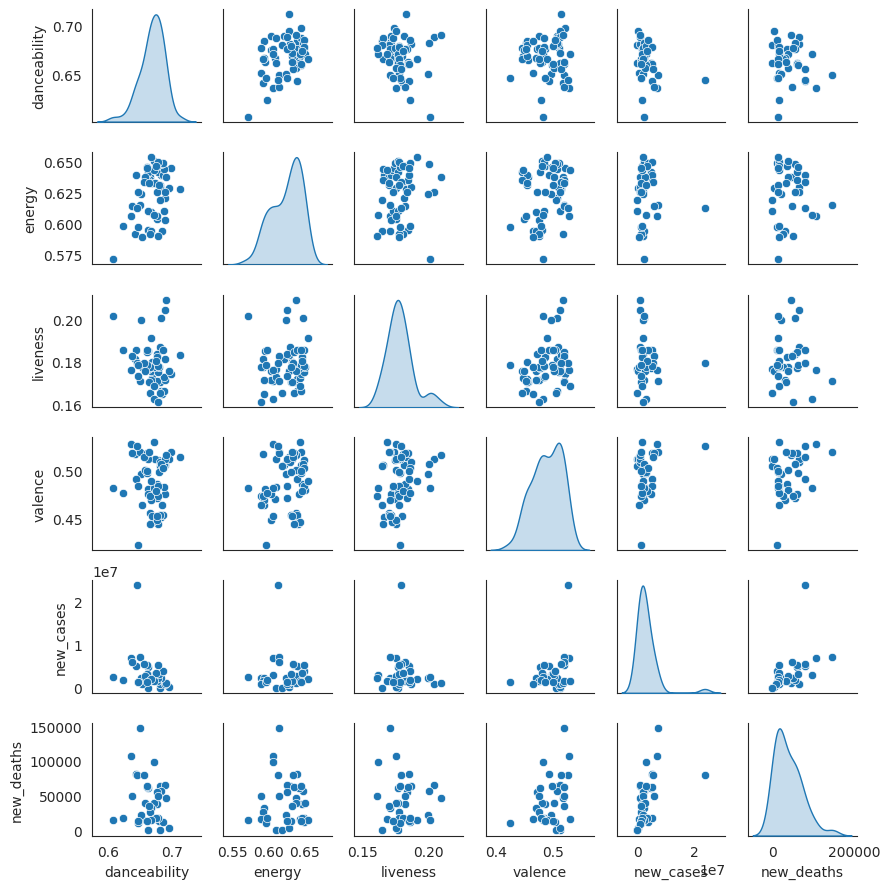

In [ ]:
df7=pd.concat([df, cases_month, death_month], axis=1)
sns.pairplot(data=df7, diag_kind='kde', height=1.5);

# 4.4. Analysis of Variance (ANOVA)

In [ ]:
#ANOVA
stats.f_oneway(df3['danceability'][df3['period'] == 'pre_covid'],
               df3['danceability'][df3['period'] == 'covid'],
               df3['danceability'][df3['period'] == 'post covid'])

F_onewayResult(statistic=5.662591040196523, pvalue=0.005713216102961753)

In [ ]:
stats.f_oneway(df3['liveness'][df3['period'] == 'pre_covid'],
               df3['liveness'][df3['period'] == 'covid'],
               df3['liveness'][df3['period'] == 'post covid'])

F_onewayResult(statistic=4.991142486497245, pvalue=0.010059457658851084)

In [ ]:
stats.f_oneway(df3['energy'][df3['period'] == 'pre_covid'],
               df3['energy'][df3['period'] == 'covid'],
               df3['energy'][df3['period'] == 'post covid'])

F_onewayResult(statistic=0.28063854908181823, pvalue=0.7563388159924127)

In [ ]:
stats.f_oneway(df3['valence'][df3['period'] == 'pre_covid'],
               df3['valence'][df3['period'] == 'covid'],
               df3['valence'][df3['period'] == 'post covid'])

F_onewayResult(statistic=3.659214747801612, pvalue=0.03197964151745859)

In [ ]:
#POST-HOC TESTING
#'True' indicates significant differences
import statsmodels.stats.multicomp as mc

# danceability
comp = mc.MultiComparison(df3['danceability'], df3['period'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
covid,post covid,-0.006,0.5929,-0.0206,0.0087,False
covid,pre_covid,0.0126,0.0364,0.0007,0.0246,True
post covid,pre_covid,0.0186,0.0095,0.0039,0.0333,True


In [ ]:
#liveness
comp = mc.MultiComparison(df3['liveness'], df3['period'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
covid,post covid,-0.0003,0.9967,-0.0082,0.0077,False
covid,pre_covid,-0.0079,0.0138,-0.0144,-0.0014,True
post covid,pre_covid,-0.0076,0.0635,-0.0156,0.0003,False


In [ ]:
#valence
comp = mc.MultiComparison(df3['valence'], df3['period'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
covid,post covid,-0.0085,0.5907,-0.0294,0.0123,False
covid,pre_covid,-0.0191,0.0242,-0.0362,-0.0021,True
post covid,pre_covid,-0.0106,0.4444,-0.0315,0.0103,False


# 4.5. Temporal changes to music features

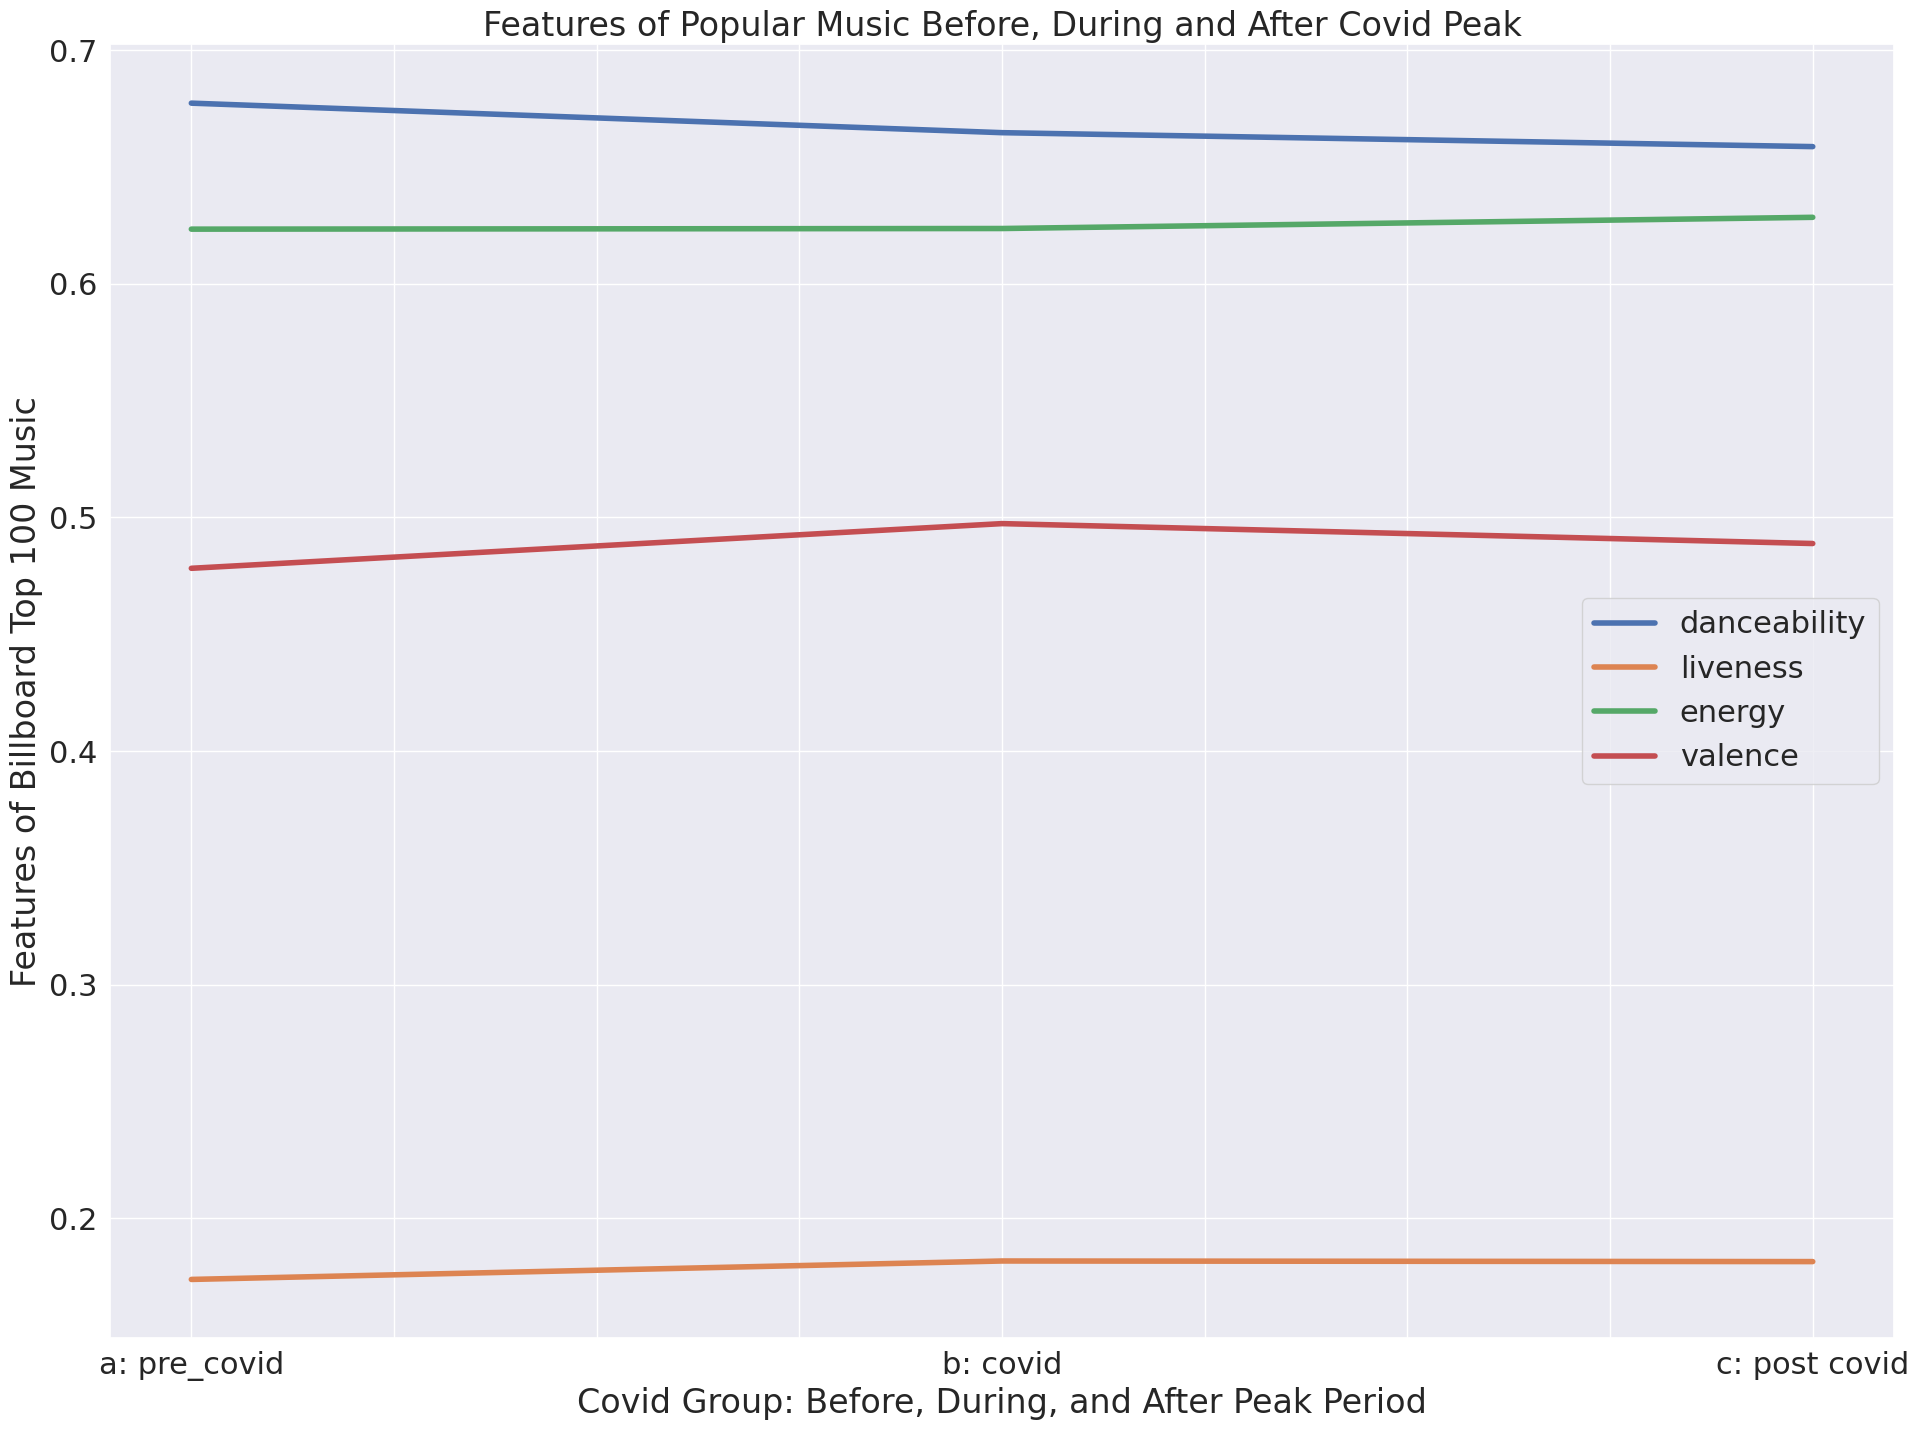

In [ ]:
df3=df.reset_index()
def covid_gr(x):
    if (x > pd.to_datetime('2016-07-01')) & (x < pd.to_datetime('2020-03-1')):
        return 'a: pre_covid'
    elif (x >= pd.to_datetime('2020-03-1')) & (x < pd.to_datetime('2022-03-1')):
        return 'b: covid'
    else:
        return 'c: post covid'
df3['period'] = df3['date'].apply(covid_gr)
df3_groupby_covid_period = df3.groupby("period")[["danceability", "liveness", "energy", "valence"]].mean().reset_index()
plot_period = df3_groupby_covid_period.plot(x="period", y=["danceability", "liveness", "energy", "valence"], rot=0, figsize=(20, 15), lw = 4);
plot_period.set_ylabel("Features of Billboard Top 100 Music");
plot_period.set_xlabel("Covid Group: Before, During, and After Peak Period")
plt.rc('font', size=30)
plot_period.set_title("Features of Popular Music Before, During and After Covid Peak")
plt.show()

In [ ]:
df3.groupby('period').aggregate(['mean', 'std', 'median', 'min', 'max'])

<ipython-input-105-c706620e04f6>:1: FutureWarning: ['date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df3.groupby('period').aggregate(['mean', 'std', 'median', 'min', 'max'])


danceability                                            energy  \
                      mean       std    median       min       max      mean   
period                                                                         
a: pre_covid      0.676289  0.014058  0.676184  0.643654  0.712365  0.625257   
b: covid          0.665483  0.016256  0.664355  0.638130  0.694276  0.623161   
c: post covid     0.658317  0.023744  0.664667  0.606632  0.685142  0.628069   

                                                       liveness            \
                    std    median       min       max      mean       std   
period                                                                      
a: pre_covid   0.018594  0.633192  0.592983  0.650037  0.173932  0.006682   
b: covid       0.016264  0.625741  0.592586  0.649206  0.182508  0.010817   
c: post covid  0.026932  0.638019  0.568964  0.654313  0.181558  0.009028   

                                              valence                      \
                 median       min       max      mean       std    median   
period                                                                      
a: pre_covid   0.173604  0.163061  0.185982  0.476755  0.028415  0.471619   
b: covid       0.180099  0.165665  0.207920  0.496688  0.019155  0.498990   
c: post covid  0.179370  0.170166  0.202283  0.488119  0.026227  0.486392   

                                   
                    min       max  
period                             
a: pre_covid   0.442268  0.518134  
b: covid       0.464000  0.525361  
c: post covid  0.423004  0.528790

In [ ]:
df3

,date,danceability,energy,liveness,valence,period
0,2018-03-31,0.681868,0.640370,0.168083,0.452202,a: pre_covid
1,2018-04-30,0.663734,0.638714,0.172988,0.455844,a: pre_covid
2,2018-05-31,0.676025,0.643181,0.179169,0.444030,a: pre_covid
3,2018-06-30,0.682083,0.641659,0.173849,0.449141,a: pre_covid
4,2018-07-31,0.676437,0.633578,0.166637,0.448538,a: pre_covid
5,2018-08-31,0.664608,0.645277,0.166729,0.442268,a: pre_covid
6,2018-09-30,0.664410,0.636998,0.164430,0.442782,a: pre_covid
7,2018-10-31,0.668683,0.633244,0.180939,0.450326,a: pre_covid
8,2018-11-30,0.674351,0.603192,0.177146,0.446642,a: pre_covid
9,2018-12-31,0.660855,0.592983,0.185982,0.474207,a: pre_covid


In [ ]:
df4

,danceability,energy,liveness,valence,new_cases,new_deaths
0,0.681868,0.640370,0.168083,0.452202,0.0,0.0
1,0.663734,0.638714,0.172988,0.455844,0.0,0.0
2,0.676025,0.643181,0.179169,0.444030,0.0,0.0
3,0.682083,0.641659,0.173849,0.449141,0.0,0.0
4,0.676437,0.633578,0.166637,0.448538,0.0,0.0
...,...,...,...,...,...,...
57,0.606632,0.568964,0.202283,0.480780,2470177.0,15534.0
58,0.623110,0.595862,0.184707,0.475901,1792471.0,17291.0
59,0.646483,0.625180,0.173486,0.484471,1252599.0,13780.0
60,0.000000,0.000000,0.000000,0.000000,819959.0,9005.0


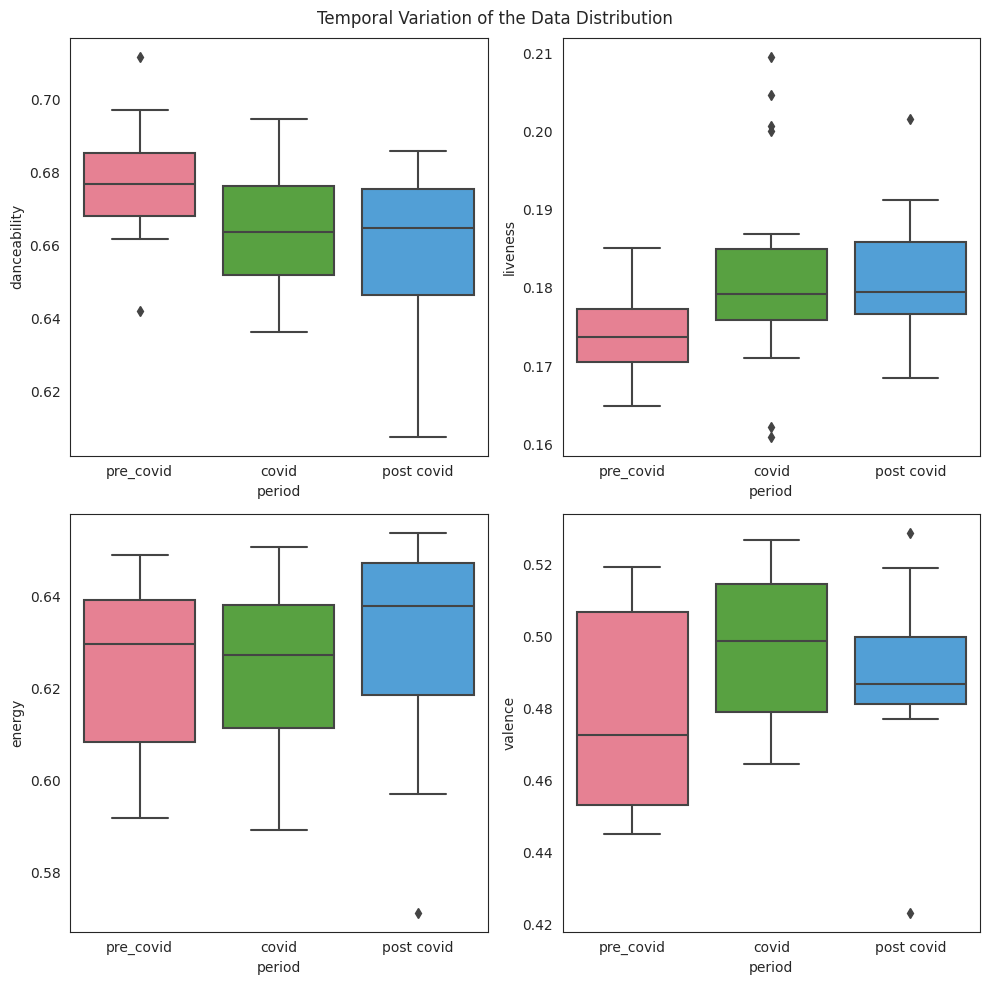

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Temporal Variation of the Data Distribution')

sns.boxplot(data=df3, x='period', y='danceability', ax=axes[0,0], palette="husl")
sns.boxplot(data=df3, x='period', y='liveness', ax=axes[0,1], palette="husl")
sns.boxplot(data=df3, x='period', y='energy', ax=axes[1,0],palette="husl")
sns.boxplot(data=df3, x='period', y='valence', ax=axes[1,1],palette="husl")
sns.set_style("white")
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Temporal Variation of the music features')
sns.set_style("white")
sns.barplot(data=df3, x='period', y='danceability', ax=axes[0,0], palette="husl",errorbar='sd', capsize=0.1)
sns.barplot(data=df3, x='period', y='liveness', ax=axes[0,1], palette="husl",errorbar='sd',capsize=0.1)
sns.barplot(data=df3, x='period', y='energy', ax=axes[1,0],palette="husl",errorbar='sd',capsize=0.1)
sns.barplot(data=df3, x='period', y='valence', ax=axes[1,1],palette="husl",errorbar='sd',capsize=0.1)

plt.show()

NameError: ignored

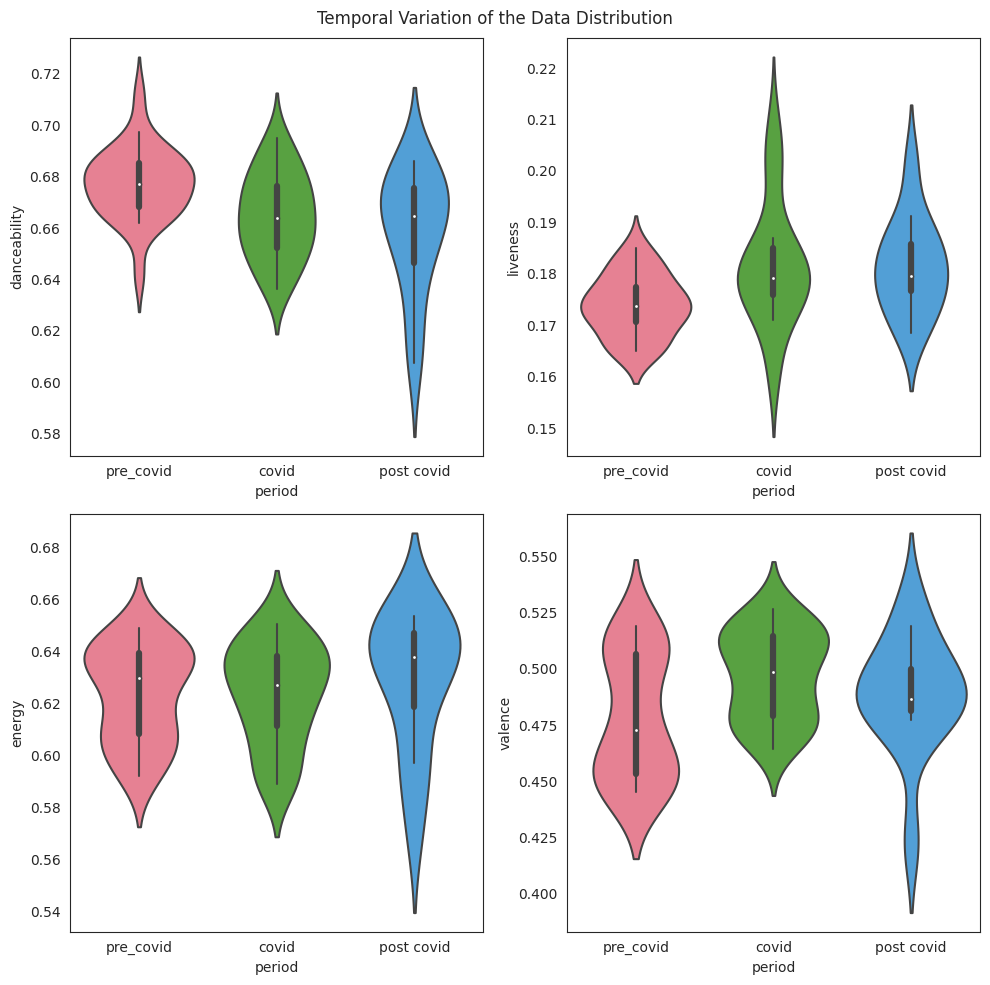

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('Temporal Variation of the Data Distribution')

sns.violinplot(data=df3, x='period', y='danceability', ax=axes[0,0], palette="husl")
sns.violinplot(data=df3, x='period', y='liveness', ax=axes[0,1], palette="husl")
sns.violinplot(data=df3, x='period', y='energy', ax=axes[1,0],palette="husl")
sns.violinplot(data=df3, x='period', y='valence', ax=axes[1,1],palette="husl")
sns.set_style("white")
plt.show()

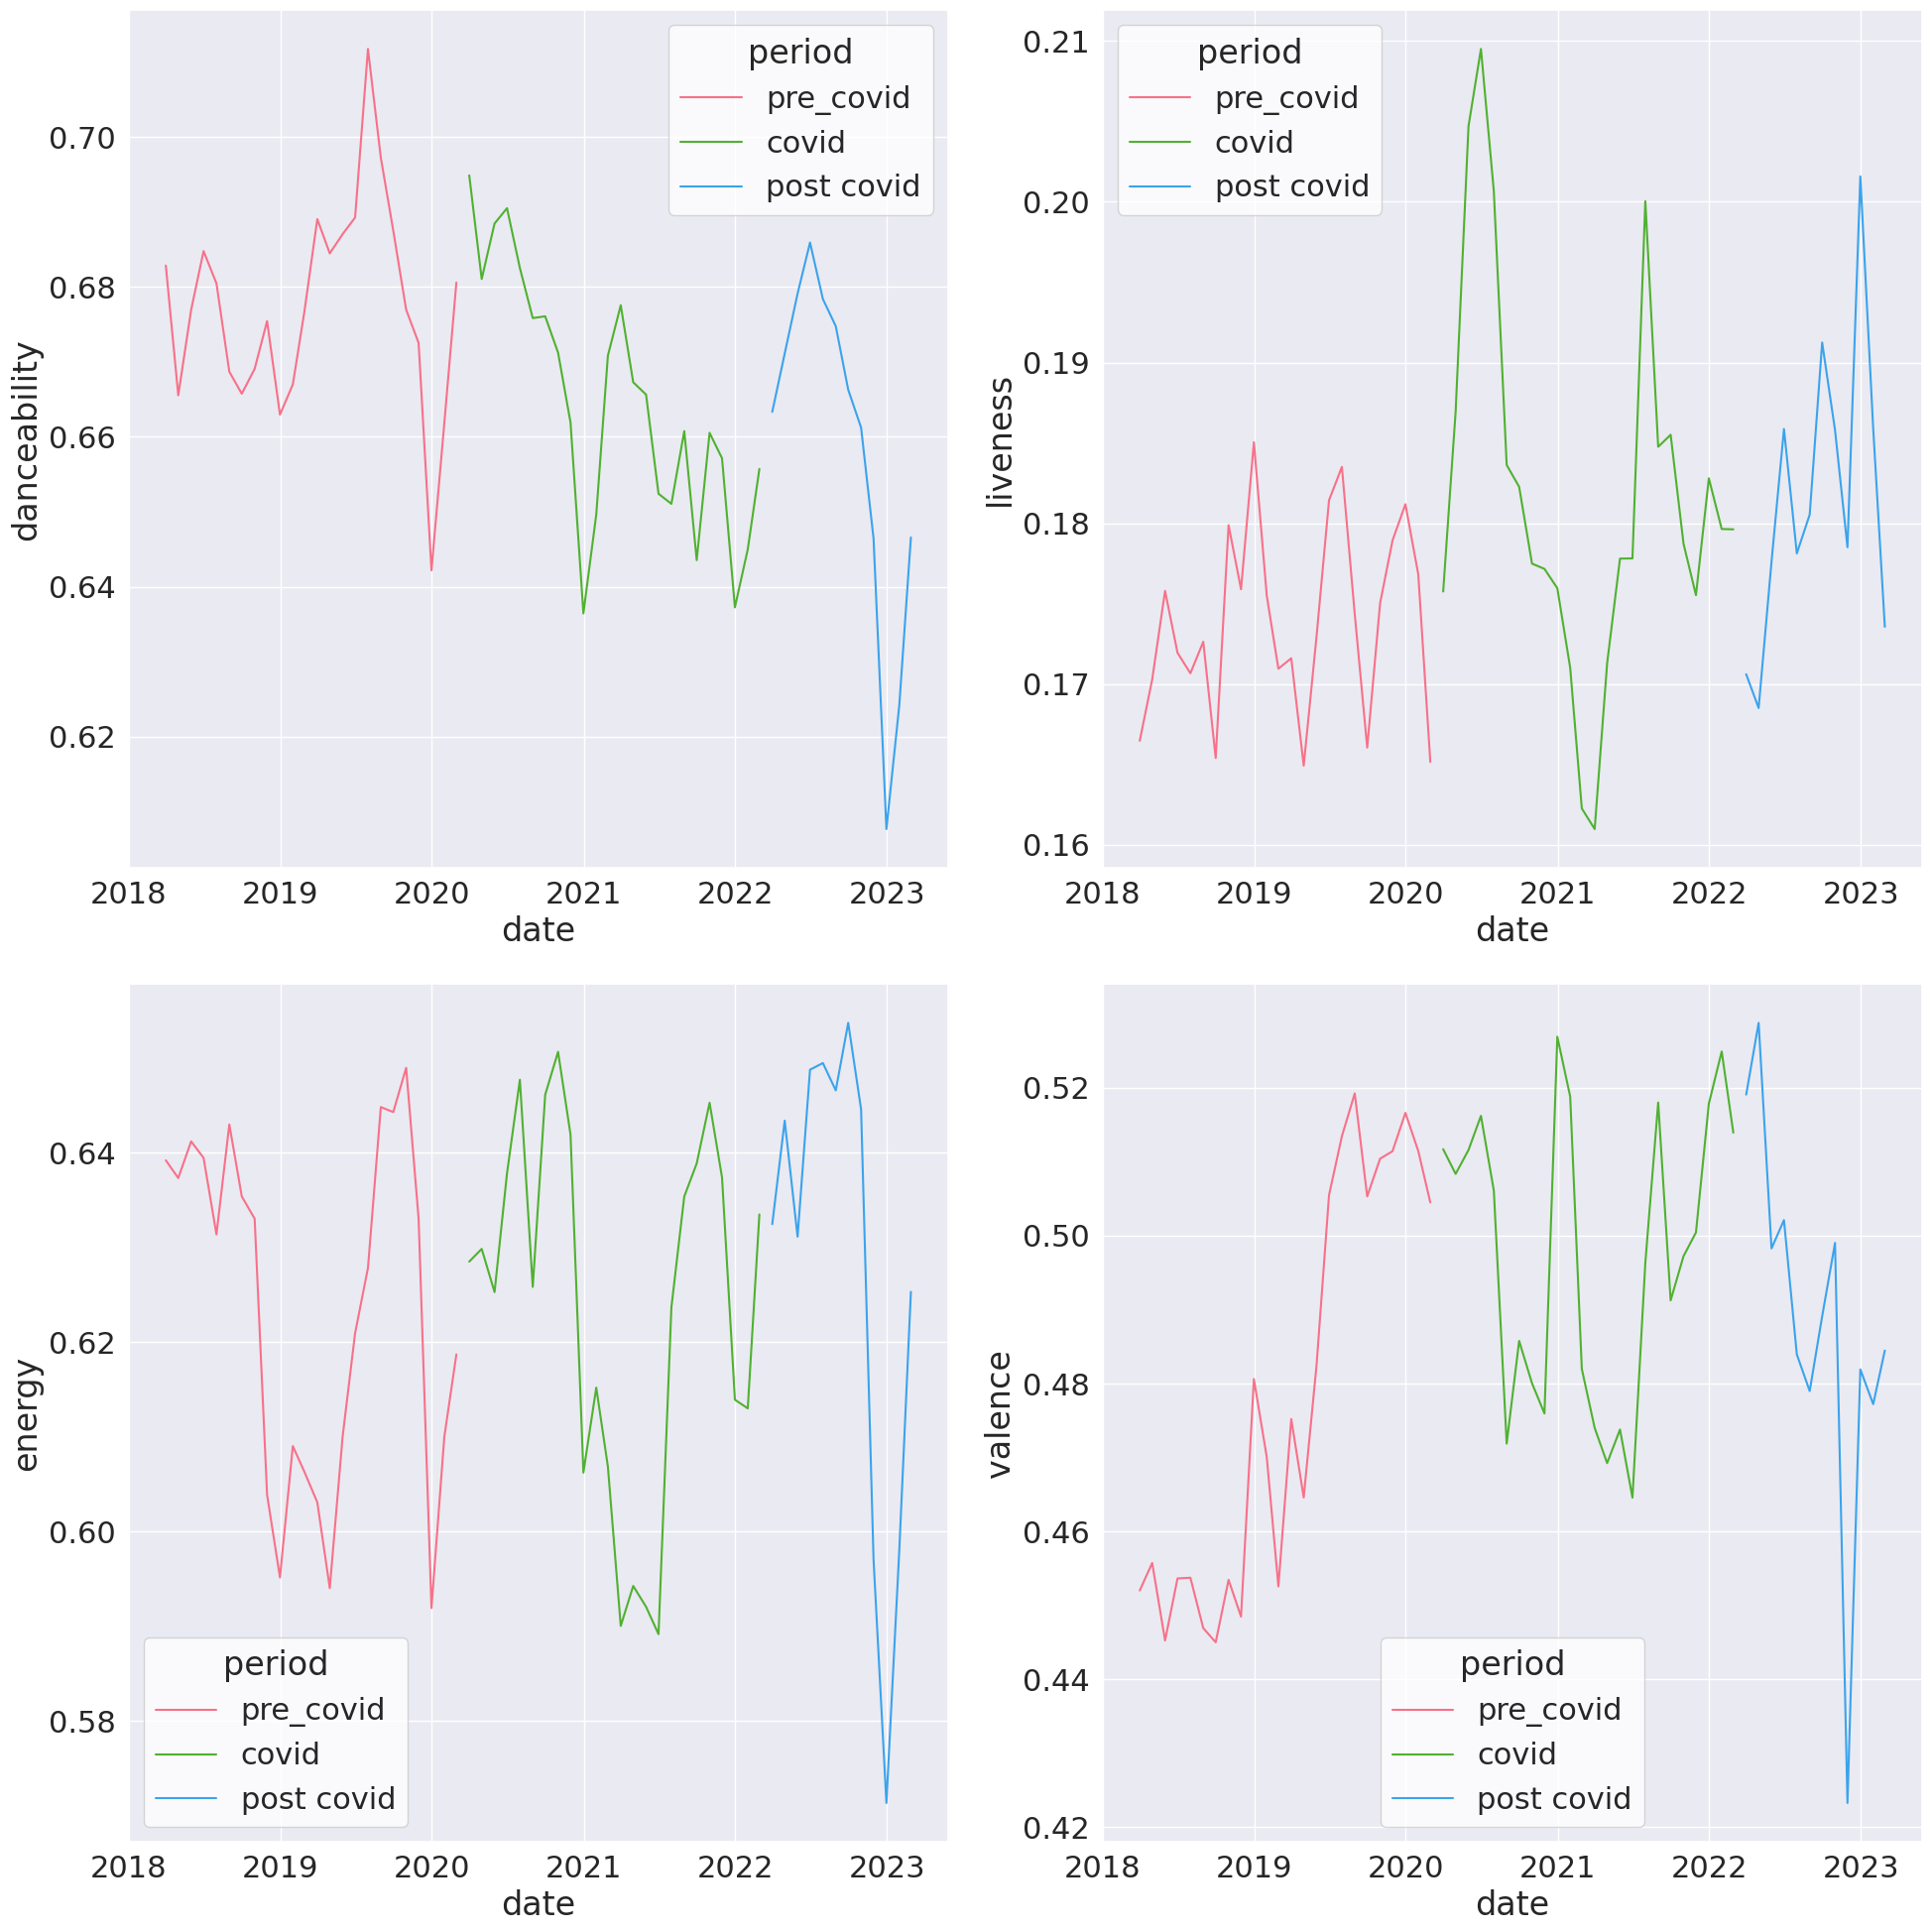

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,20))

sns.set_style("white")
sns.lineplot(data=df3, x='date', y='danceability', ax=axes[0,0], palette="husl",hue="period")
sns.lineplot(data=df3, x='date', y='liveness', ax=axes[0,1], palette="husl",hue="period")
sns.lineplot(data=df3, x='date', y='energy', ax=axes[1,0],palette="husl",hue="period")
sns.lineplot(data=df3, x='date', y='valence', ax=axes[1,1],palette="husl", hue="period")
sns.set(font_scale=2)

plt.show()

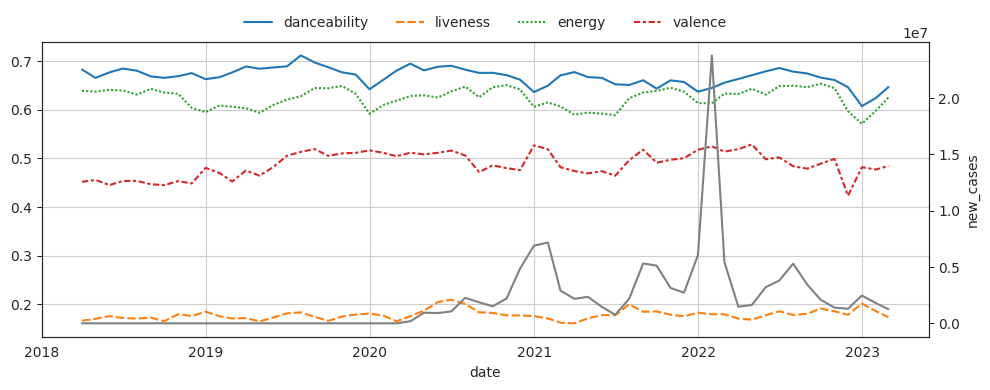

In [ ]:
df6= pd.concat([df, cases_month, death_month], axis=1)
df6.fillna(0, inplace=True)
df6.drop(labels=['2023-03-31', '2023-03-31','2023-04-30'], axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.yaxis.grid(True)
ax1.xaxis.grid(True)
sns.lineplot(data=df6[['danceability', 'liveness', 'energy', 'valence']], legend=True, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df6['new_cases'] ,color= "grey", ax=ax2)
sns.move_legend  (ax1, "lower center",bbox_to_anchor=(0.5, 1), ncol=4, frameon=False)

plt.show()


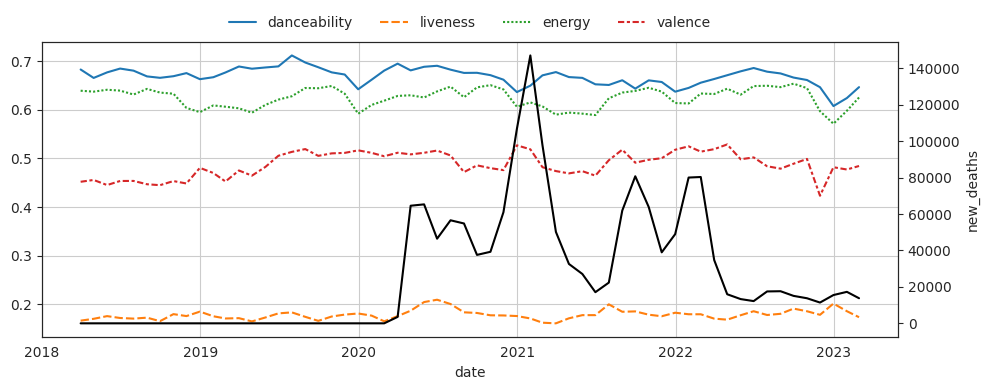

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.yaxis.grid(True)
ax1.xaxis.grid(True)
sns.lineplot(data=df6[['danceability', 'liveness', 'energy', 'valence']], legend=True, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df6['new_deaths'] ,color= "black", legend=True, ax=ax2)
sns.move_legend  (ax1, "lower center",bbox_to_anchor=(0.5, 1), ncol=4, frameon=False)

plt.show()

# 4.6. K-Nearest Neighbors Algorithm

[Text(0.5, 1.0, 'Average KNN Accuracy Scores for Different Feature Combinations')]

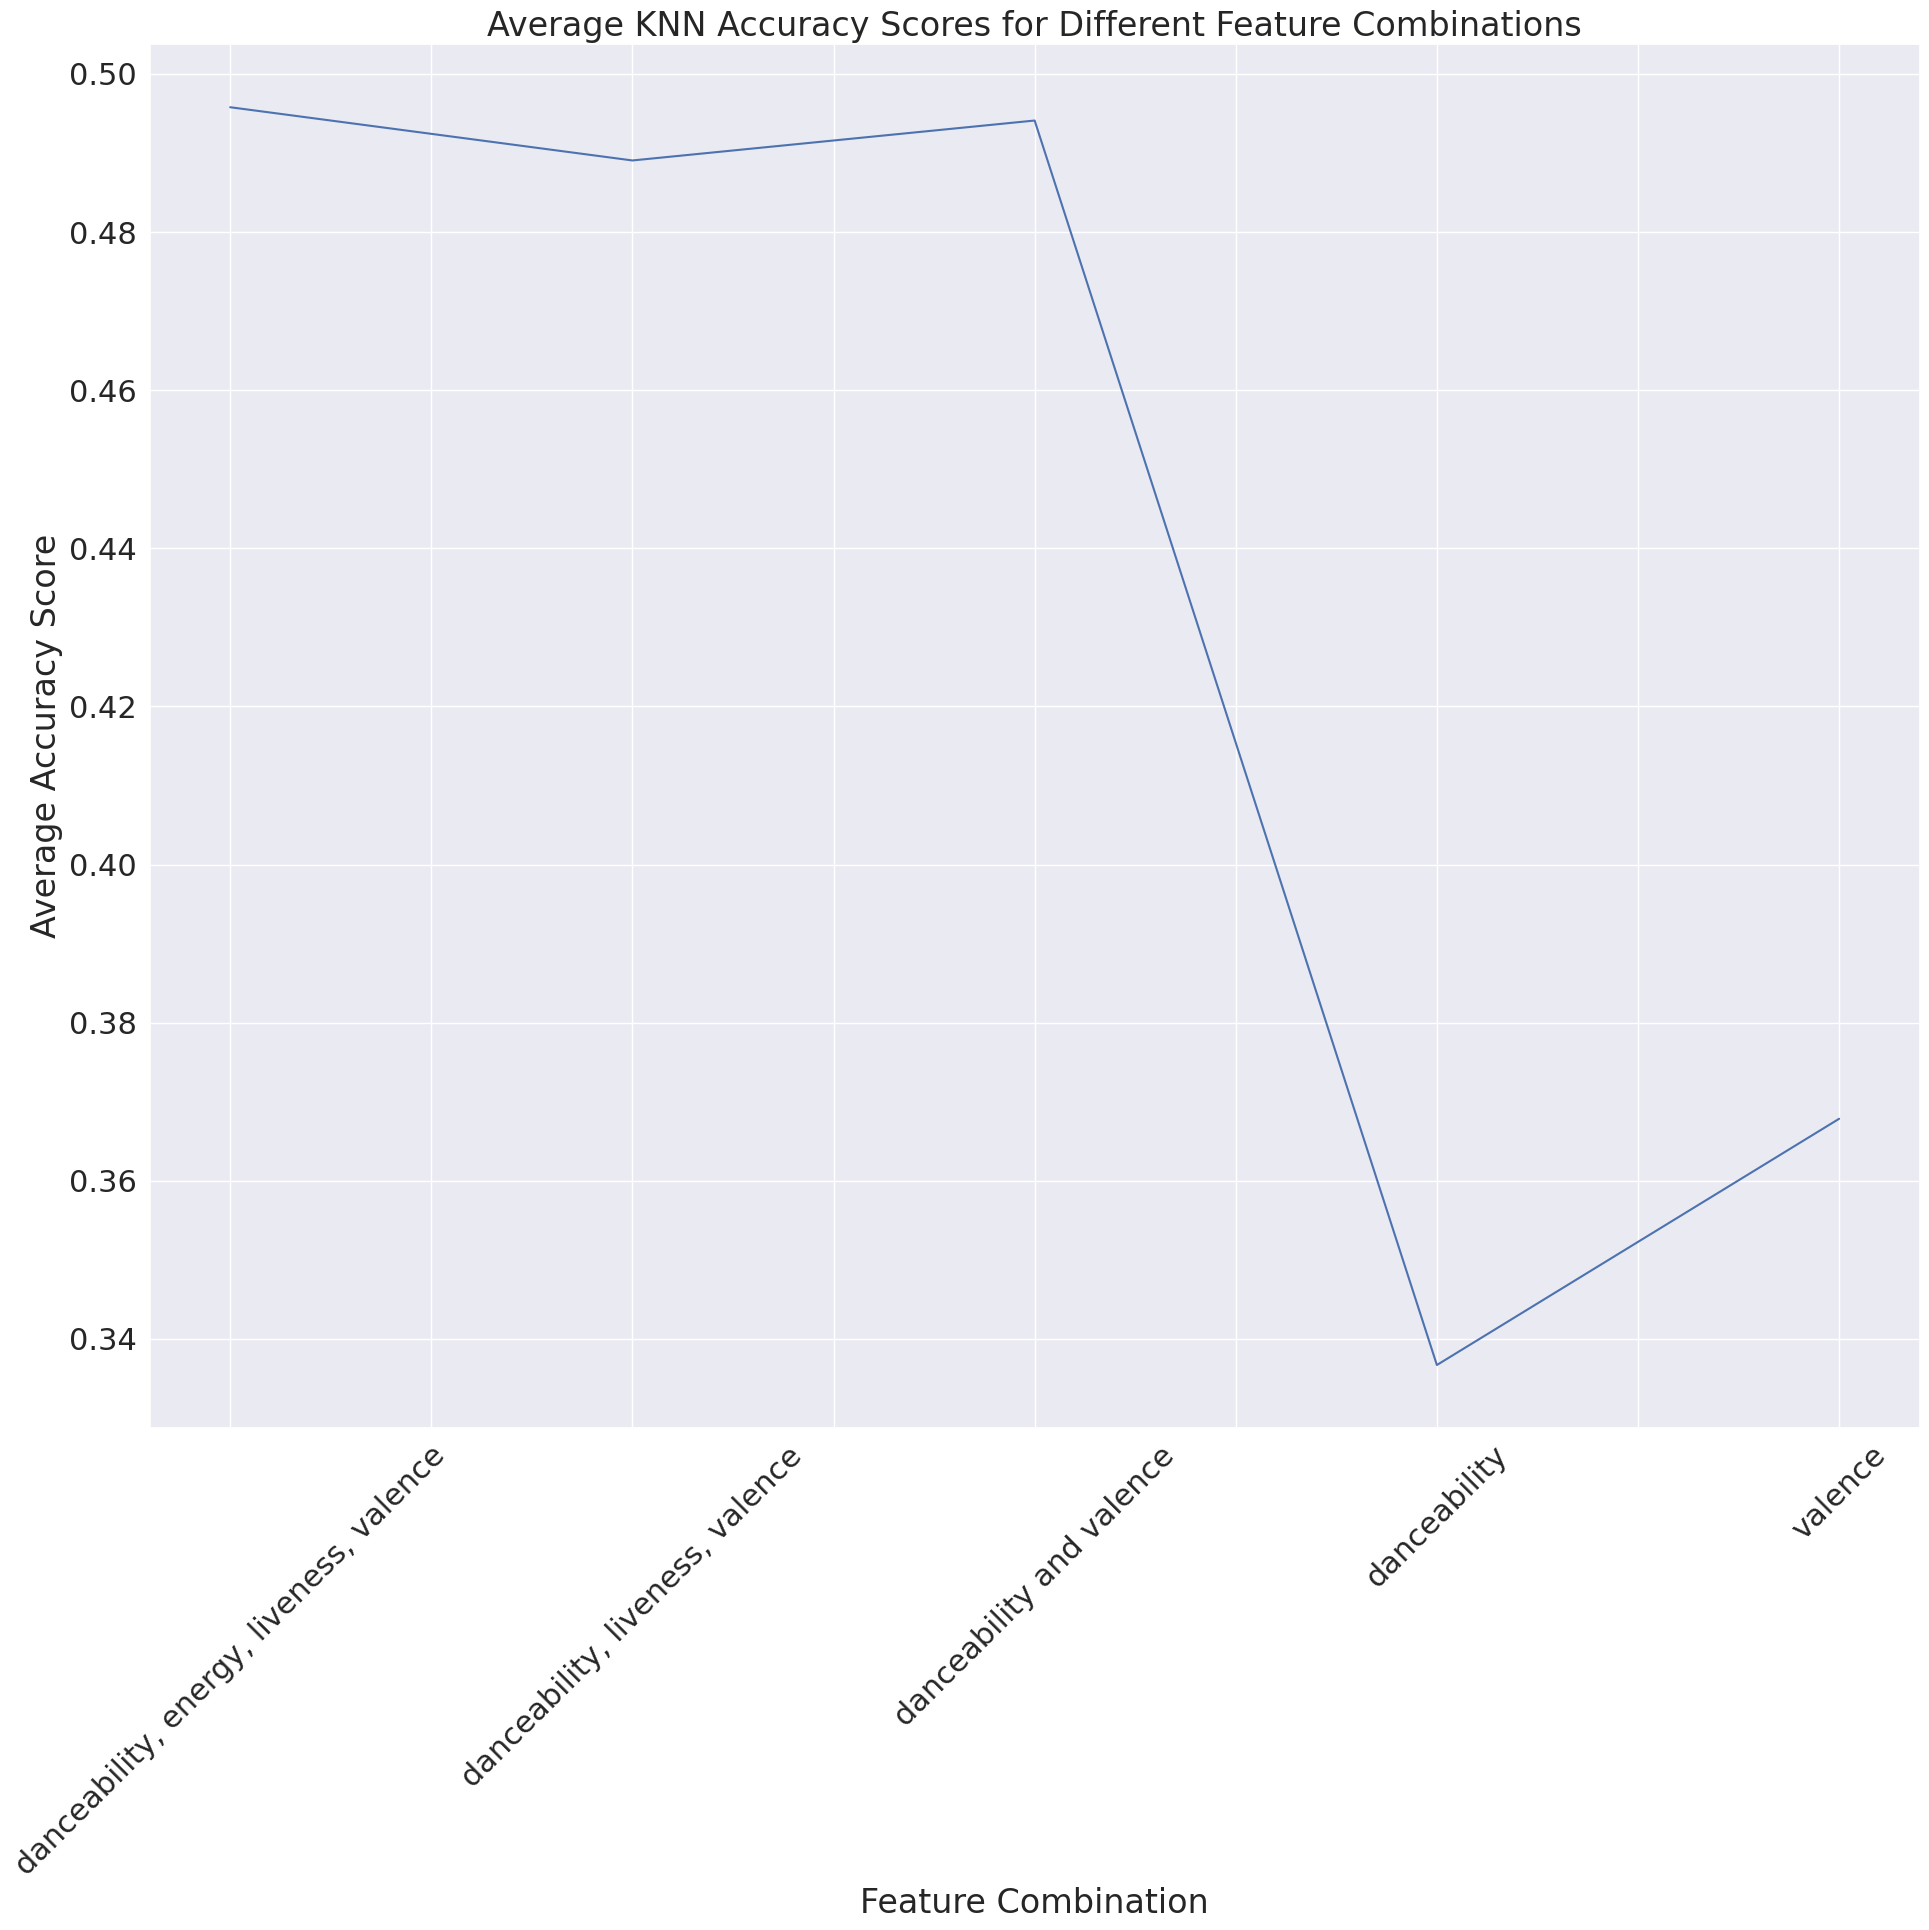

In [ ]:
import pandas as pd

#df4=pd.read_excel('df4.xlsx')

knn_class_groups = [df5[['danceability', 'energy', 'liveness', 'valence']],df5[['danceability', 'liveness', 'valence']],df5[['danceability', 'valence']],df5[['danceability']],df5[['valence']]]
df_acc_knn = pd.DataFrame([], index = ["danceability, energy, liveness, valence", "danceability, liveness, valence", "danceability and valence", "danceability", "valence"], columns=['Accuracy Scores'])

acc_list_average = []
for repeat in range(1, 100):
    acc_list = []

    for i in knn_class_groups:

      #prep data
        X = i #df4[['danceability', 'energy', 'liveness', 'valence']]
        y = df5["period"]
        X.to_numpy()
        y.to_numpy()

        #train test split
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        #feature scaling
        from sklearn.preprocessing import MinMaxScaler, StandardScaler
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        #run classifier
        from sklearn.neighbors import KNeighborsClassifier
        knn_clf = KNeighborsClassifier(n_neighbors=3)
        knn_clf.fit(X_train_scaled, y_train)
        y_pred = knn_clf.predict(X_test_scaled)

        #accuracy
        from sklearn.metrics import accuracy_score
        #print(accuracy_score(y_test, y_pred))
        acc_list.append(accuracy_score(y_test, y_pred))

    df_acc_knn[repeat] = acc_list

df_acc_knn['mean'] = df_acc_knn.mean(axis = 1)

k_plot = df_acc_knn['mean'].plot(rot=45, figsize=(20, 20));
k_plot.set_ylabel("Average Accuracy Score");
k_plot.set_xlabel("Feature Combination");
k_plot.set(title = "Average KNN Accuracy Scores for Different Feature Combinations")

#We ran a knn classifier to see whether different combinations of features could predict covid time period.
#We chose combinations of features based on what we saw during data exploration - we expected that danceability
#and valence would have the most predictive power.
#After running the classifier 100 times and taking the average for each feature combination of interest,
#the best models were 1) 4 features: danceability, energy, liveness, and valence, with an average
#accuracy score of .6 - about double what would be expected by chance. 2) 2 features: danceability and valence,
#did equally well to 4 features, with an accuracy score of .6. This corresponds to our other data suggesting
#the most interesting trends in the danceability feature and valence feature.